<a href="https://colab.research.google.com/github/Fagner608/An-lise-Explorat-ria-de-Dados-de-Log-stica/blob/main/DataEngeneering__e_commerce_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Engenharia de dados

###Preparação do ambiente

In [1]:
# diretório
from google.colab import drive
drive.mount("/content/drive")
%cd drive/MyDrive/Colab Notebooks
%cd DSA/Spark/analise

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/DSA/Spark/analise


In [2]:
# Imports
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versão do python e pacotes
!pip install -q -U watermark
from platform import python_version
print(f'Versão python utilizada: {python_version()}.')
%reload_ext watermark
%watermark -a "Fagner Fernands Farias" --iversion

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
Versão python utilizada: 3.10.12.
Author: Fagner Fernands Farias

pandas    : 1.5.3
google    : 2.0.3
matplotlib: 3.7.1
scipy     : 1.10.1
seaborn   : 0.12.2
numpy     : 1.23.5



###Carga

In [5]:
#Carga
dados = pd.read_csv("dataset.csv")

In [6]:
#Visualização
dados.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [7]:
# Tipos, null, dimensões.

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# Labels das variáveis numéricas
nums = dados.select_dtypes(include = 'int64').columns.drop(['ID', 'entregue_no_prazo'])

In [10]:
# Labels das variáveis categóricas
cats = dados.select_dtypes(include = 'object').columns

###Estatísticas

**Numéricas**

In [11]:
# resumo - numéricas
dados[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Aparentemente, somente a variável 'desconto' apresenta assimetria, além de grande variância.

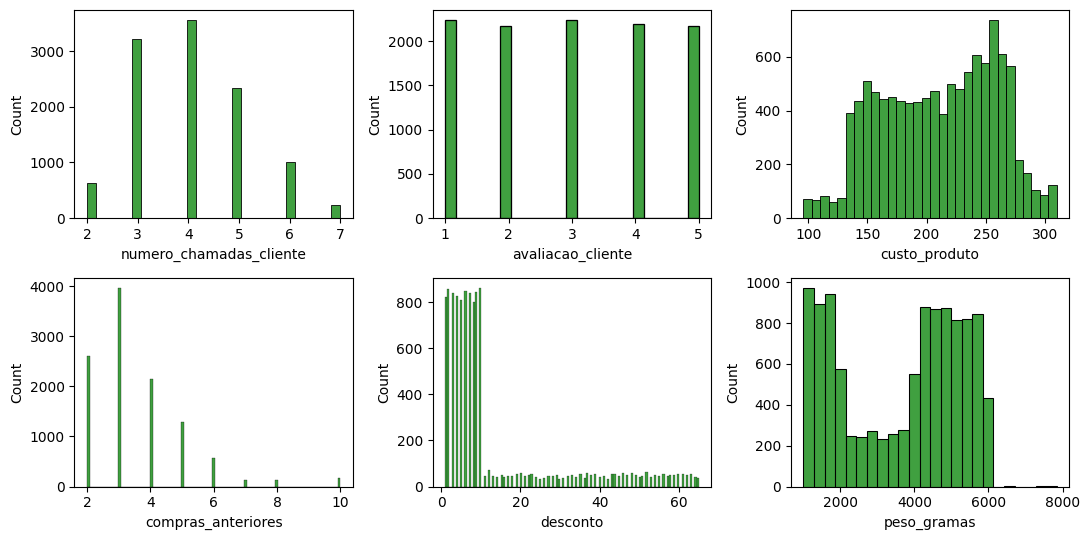

In [20]:
# Visualizando plots
plt.figure(figsize = (11,5.5))
for i, col in enumerate(nums):
  plt.subplot(2, int(len(nums)/2), i + 1)
  sns.histplot(x = dados[col], color = 'green')
  plt.tight_layout()

Interpretação dos gráficos:

- As variáveis 'numero_chamadas_cliente' e 'avaliacao_cliente' parecem uma distribuição uniforme;
- A variável 'desconto', conforme verificado, possui uma distribuição assimétricas à direta;
- A variável 'peso_gramas' possui forma de 'U', sendo uma distribuição bimodal, sugerindo a presença de duas populações em nossos dados.

**Elimimando outliers**

In [23]:
# Aplicando filtragem
registros = np.array([True] * len(dados))
for col in nums:

  zscore = abs(stats.zscore(dados[col]))

  registros = (zscore < 3) & registros

In [26]:
print(f'São {np.count_nonzero(registros)} registros que não são outliers, e, {np.count_nonzero(registros == False)} outliers.')

São 10643 registros que não são outliers, e, 357 outliers


In [27]:
# Removendo outliers
dados = dados[registros]

**Categóricas**

In [13]:
# resumo - categóricas
dados[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


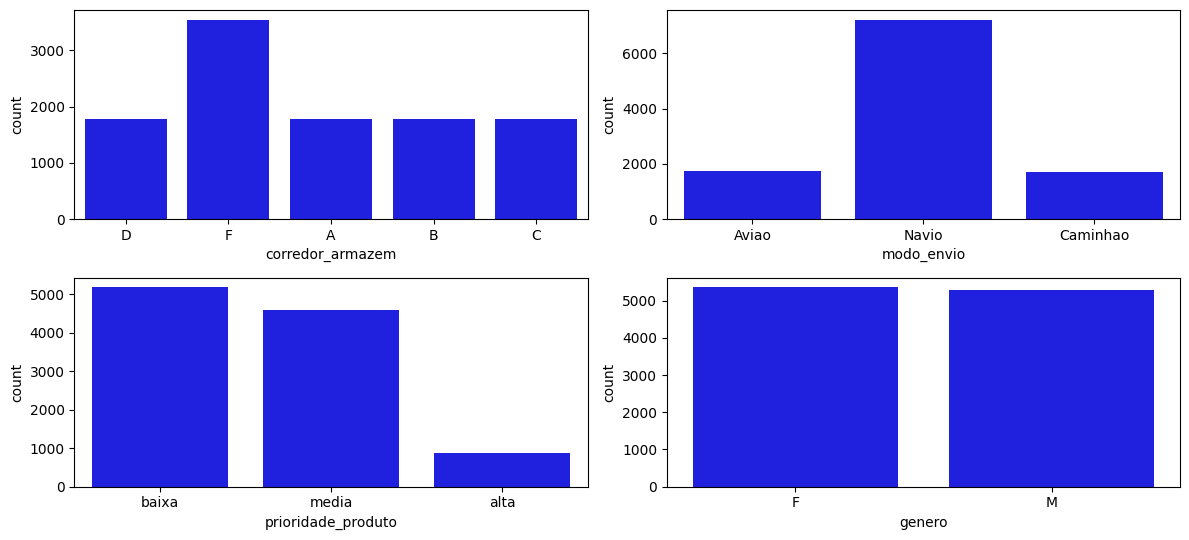

In [30]:
# Visualizando frequência dos dados
#amostra
dadosSample = dados.sample(1000, random_state= 42)
plt.figure(figsize = (12,5.5))
for i, col in enumerate(cats):
  plt.subplot(2, 2, i + 1)
  sns.countplot(data = dados, x = col, color = 'blue', orient = 'v')
  plt.tight_layout()

<iframe src="https://drive.google.com/file/d/1BEdRLp_gUVsmkN2PdmDwlKyn58XzoLN9/preview" width="640" height="480" allow="autoplay"></iframe>


In [37]:
from IPython.display import IFrame
IFrame(src="https://drive.google.com/file/d/1BEdRLp_gUVsmkN2PdmDwlKyn58XzoLN9/preview", width="500", height="70")
